In [3]:
import pandas as pd

dat_df = pd.read_csv('../datasets/ric/energydata.csv', sep=',')[['date', 'Appliances']]
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')

dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


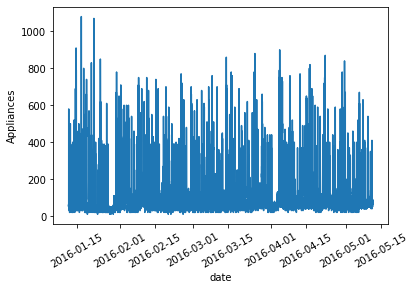

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('Appliances')
plt.show()

## K-NN法による教師データの作成

In [5]:
train = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train.shape)

test = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test.shape)

(13104, 2)
(4320, 2)


In [6]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()
train = mc.fit_transform(train[['Appliances']])
test = mc.fit_transform(test[['Appliances']])

In [7]:
width = 144
train = train.flatten()
train_vec = []

for i in range(len(train)-width):
    train_vec.append(train[i:i+width])
    
print(pd.DataFrame(train_vec).shape)
pd.DataFrame(train_vec).head()

(12960, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794


In [8]:
test = test.flatten()
test_vec = []

for i in range(len(test)-width):
    test_vec.append(test[i:i+width])
    
print(pd.DataFrame(test_vec).shape)
pd.DataFrame(test_vec).head()

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882


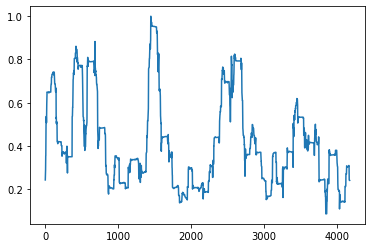

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

model = NearestNeighbors(n_neighbors=1)
model.fit(train_vec)

dist, _ = model.kneighbors(test_vec)
dist = dist/np.max(dist)

plt.plot(dist)
plt.show()

## オートエンコーダによる教師データの作成

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(144,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(144, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               18560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 144)               18576     
Total params: 57,904
Trainable params: 57,904
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(loss='mse', optimizer='adam')
hist = model.fit(train_vec, train_vec, batch_size=128, verbose=1, epochs=20, validation_split=0.2)


Train on 10368 samples, validate on 2592 samples
Epoch 1/20
10368/10368 [==============================] - 1s 93us/step - loss: 0.0487 - val_loss: 0.0168
Epoch 2/20
10368/10368 [==============================] - 0s 16us/step - loss: 0.0163 - val_loss: 0.0156
Epoch 3/20
10368/10368 [==============================] - 0s 17us/step - loss: 0.0141 - val_loss: 0.0124
Epoch 4/20
10368/10368 [==============================] - 0s 17us/step - loss: 0.0099 - val_loss: 0.0084
Epoch 5/20
10368/10368 [==============================] - 0s 17us/step - loss: 0.0083 - val_loss: 0.0059
Epoch 6/20
10368/10368 [==============================] - 0s 17us/step - loss: 0.0071 - val_loss: 0.0056
Epoch 7/20
10368/10368 [==============================] - 0s 17us/step - loss: 0.0070 - val_loss: 0.0056
Epoch 8/20
10368/10368 [==============================] - 0s 17us/step - loss: 0.0069 - val_loss: 0.0055
Epoch 9/20
10368/10368 [==============================] - 0s 16us/step - loss: 0.0067 - val_loss: 0.0053
Epoch

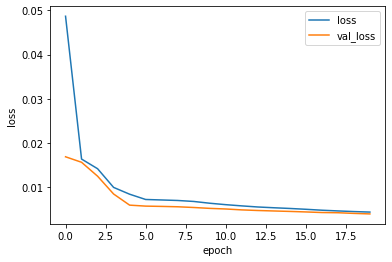

In [16]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

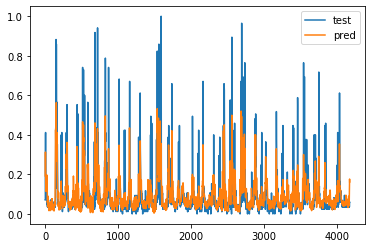

In [17]:
pred = model.predict(test_vec)

plt.plot(test_vec[:,0], label='test')
plt.plot(pred[:,0], label='pred')
plt.legend()
plt.show()

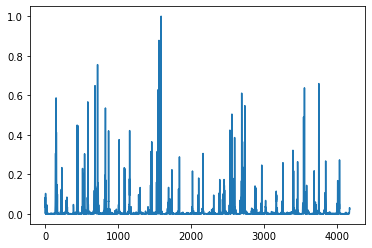

In [18]:
dist = test_vec[:,0] - pred[:,0]
dist = pow(dist, 2)
dist = dist/np.max(dist)

plt.plot(dist)
plt.show()